In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as mpimg

In [ ]:
def plot2Images(img, dst, titleImg = "Original", titleDst = "Resultado"):
    plt.subplots(figsize=(24, 14))
    plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(titleImg)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)),plt.title(titleDst)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot3GrayImages(img1, img2, img3, titleImg1 = "", titleImg2 = "", titleImg3 = ""):
    plt.subplots(figsize=(24, 14))
    plt.subplot(131), plt.imshow(img1, cmap='gray'),plt.title(titleImg1)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img2, cmap='gray'),plt.title(titleImg2)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img3, cmap='gray'),plt.title(titleImg3)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plotImage(img, title=""):
    plt.subplots(figsize=(20, 11))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(title) # cmap = 'gray' para preto e branco
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def plotGrayImage(img, title=""):
    plt.subplots(figsize=(16, 11))
    plt.imshow(img, cmap='gray'),plt.title(title) # cmap = 'gray' para preto e branco
    plt.xticks([]), plt.yticks([])
    plt.show()
# plotagem em 3d, gerado pelas matrizes do mashgrid
def plot3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot(x,y,z)
    ax.plot_surface(x, y, z, cmap="plasma", antialiased=True, cstride=2, rstride=2)
    plt.title(title)
    plt.show()

In [ ]:
def sen(f, shape):
  x = np.linspace(-5, 5, shape[1])
  y = np.linspace(-5, 5, shape[0])

  xx, yy = np.meshgrid(x, y)
  zz = np.sin(2*np.pi*f*xx)
  #plotGrayImage(zz)
  #plot3d(xx, yy, zz, "seno 3d")
  return zz

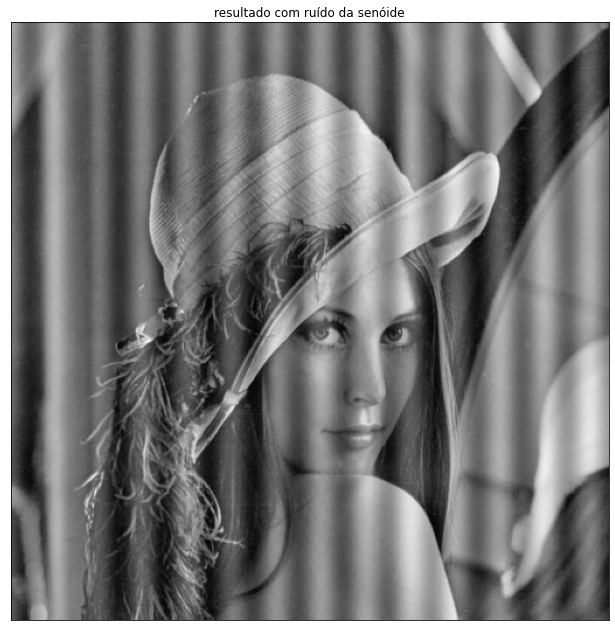

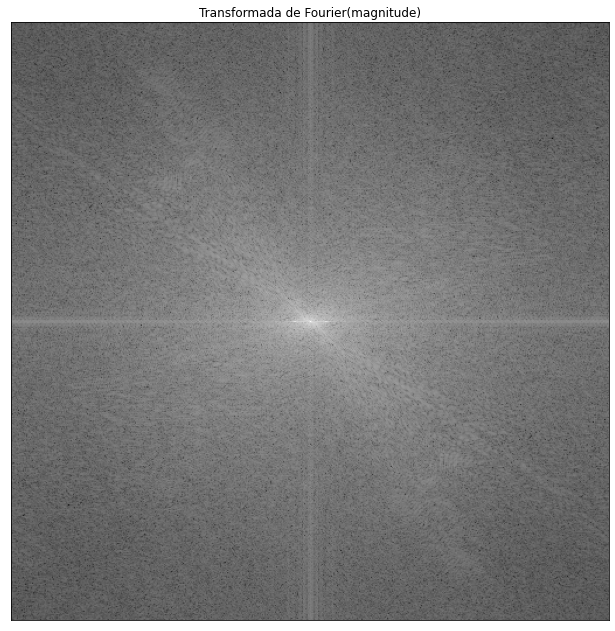

In [ ]:
f = 2
alfa = 50
theta = 0

img = cv.imread('lena-gray.png', 0)
#plotGrayImage(img)
height, width = img.shape[:2]

# Rotacionando o Seno
midPoint = (width/2, height/2)
R = cv.getRotationMatrix2D(midPoint, angle=theta, scale=1.5)
rotatedSen = cv.warpAffine(sen(f, img.shape), R, (width, height))

# Aplicando o seno
imgSen = img + alfa*rotatedSen

plotGrayImage(cv.normalize(imgSen, None, 0, 255, cv.NORM_MINMAX), "resultado com ruído da senóide")
#print(imgFT)

imgFT = np.fft.fft2(imgSen)
absFTshift = np.fft.fftshift(np.abs(imgFT))
absFTshift = 20*np.log(1 + absFTshift)
absFTshiftNorm = cv.normalize(absFTshift, None, 0, 255, cv.NORM_MINMAX)
plotGrayImage(cv.normalize(np.abs(absFTshiftNorm), None, 0, 255, cv.NORM_MINMAX), "Transformada de Fourier(magnitude)")